In [17]:
# Import necessary libraries
import sys
sys.path.append('..')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_loader import DataLoader
from src.eda import EDA
from src.feature_engineering import FeatureEngineering


Missing Values:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


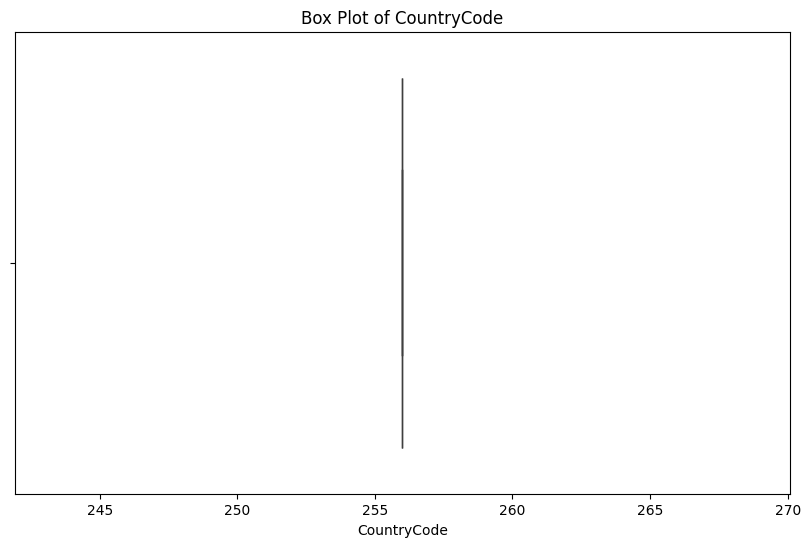

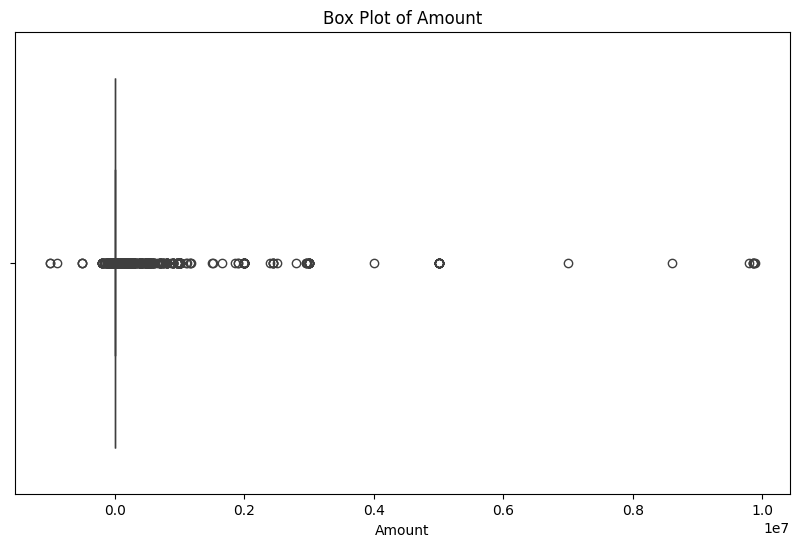

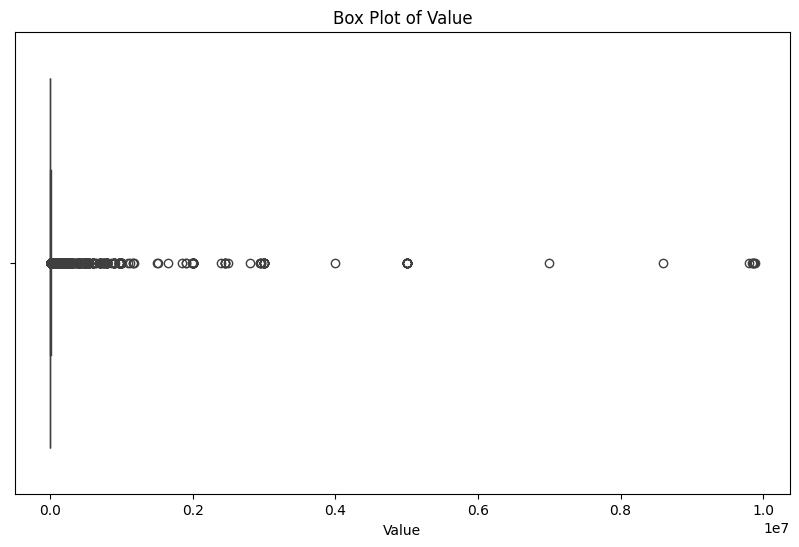

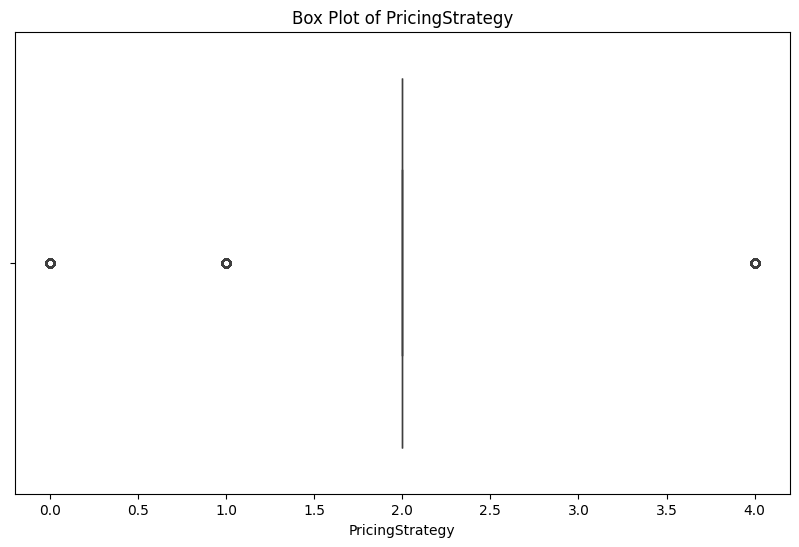

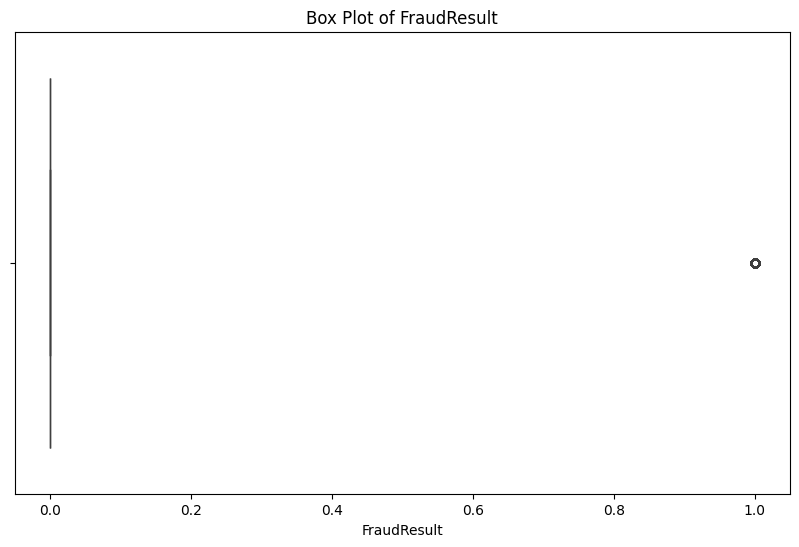

In [18]:
# Load the data
data_loader = DataLoader('../data/raw/data.csv')
df = data_loader.load_data()

# Initialize the EDA class
eda = EDA(df)

# Identifying Missing Values
missing_values = eda.check_missing_values()
print("Missing Values:\n", missing_values)

# Outlier Detection
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    eda.detect_outliers(column)

In [21]:
# Initialize the FeatureEngineering class
fe = FeatureEngineering(df)

# Perform all feature engineering steps
df = fe.perform_feature_engineering()

# Display the dataframe after feature engineering
df.head()

AttributeError: 'FeatureEngineering' object has no attribute 'perform_feature_engineering'

In [23]:
# Load the data
data_loader = DataLoader('../data/raw/data.csv')
df = data_loader.load_data()

# Display the first few rows of the dataframe before feature engineering
print("Data before feature engineering:")
print(df.head())

# Initialize the FeatureEngineering class
fe = FeatureEngineering(df)

# Perform all feature engineering steps
df = fe.perform_feature_engineering()

# Display the dataframe after feature engineering
print("Data after feature engineering:")
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/transactions.csv'